<a href="https://colab.research.google.com/github/esragcetnky/GlobalAIHubDLCourse/blob/main/Activation_Functions_%26_Number_of_hidden_layers_input_size_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [5]:
batch_size = 128
num_classes = 10
epochs = 2

In [6]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

In [9]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Part 1: Analysis of Activation Functions


### Try other Activation Functions
Analyze the accuracy and training time
#### Example Syntax 
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='relu'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Sigmoid Activation Function

In [ ]:
input=x_train.shape[1]
input

784

In [ ]:
model = Sequential()

model.add(Dense(64, activation='sigmoid', input_shape=(input,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 4ms/step - loss: 1.4298 - accuracy: 0.6376 - val_loss: 0.3556 - val_accuracy: 0.9052
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.9128 - val_loss: 0.2472 - val_accuracy: 0.9286
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2364 - accuracy: 0.9301 - val_loss: 0.2071 - val_accuracy: 0.9395
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1923 - accuracy: 0.9439 - val_loss: 0.1729 - val_accuracy: 0.9480
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1617 - accuracy: 0.9527 - val_loss: 0.1592 - val_accuracy: 0.9504
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1378 - accuracy: 0.9598 - val_loss: 0.1393 - val_accuracy: 0.9581
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1209 - accuracy: 0.9644 - val_loss: 0.1278 - val_accuracy: 0.9601
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10285505652427673
Test accuracy: 0.9695000052452087


### Relu Activation Function

In [ ]:
# Write your code here. Use the same architecture as above. 
model_relu= Sequential()
model_relu.add(Dense(units=64,
                     activation='relu',
                     input_shape=(input,)))
model_relu.add(Dense(units=64,
                     activation='relu'))
model_relu.add(Dense(num_classes,
                     activation='softmax'))
model_relu.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_relu.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model_relu.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6220 - accuracy: 0.8309 - val_loss: 0.2024 - val_accuracy: 0.9386
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1769 - accuracy: 0.9496 - val_loss: 0.1310 - val_accuracy: 0.9613
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9633 - val_loss: 0.1198 - val_accuracy: 0.9642
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0958 - accuracy: 0.9715 - val_loss: 0.0998 - val_accuracy: 0.9705
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9755 - val_loss: 0.0982 - val_accuracy: 0.9707
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0668 - accuracy: 0.9801 - val_loss: 0.1112 - val_accuracy: 0.9674
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0563 - accuracy: 0.9834 - val_loss: 0.0961 - val_accuracy: 0.9719
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10285505652427673
Test accuracy: 0.9695000052452087


### Write your findings about activations here?

1.   Finding 1 : Sigmoid
* Test loss: 0.10285505652427673
* Test accuracy: 0.9695000052452087
2.   Finding 2 : Relu
* Test loss: 0.10285505652427673
* Test accuracy: 0.9695000052452087




# Part 2: Design Choices: Nodes
#### Analyze the parameter size, accuracy and training time

### Design a model with small Number of Nodes. For Example 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 15s - loss: 1.8398 - acc: 0.5610 - val_loss: 1.3080 - val_acc: 0.7207
Epoch 2/2
60000/60000 [==============================] - 11s - loss: 0.9784 - acc: 0.7753 - val_loss: 0.7332 - val_acc: 0.8147
Test loss: 0.7331901484489441
Test accuracy: 0.8147
Shape of First Layer (784, 8)
Visualization of F

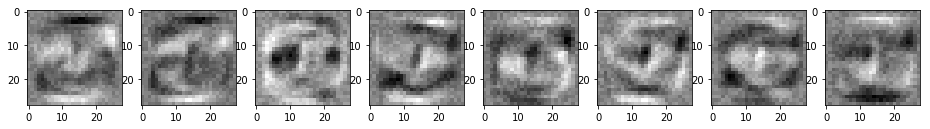

In [ ]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with large Number of Nodes. For example 128

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                31400     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1312      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 33,042
Trainable params: 33,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.6659 - accuracy: 0.5458 - val_loss: 0.5715 - val_accuracy: 0.8709
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.4769 - accuracy: 0.8862 - val_loss: 0.3146 - val_accuracy: 0.9151
Test loss: 0.3145703971385956
Test accuracy: 0.9150999784469604
Shape of First Layer (784, 40)
Vis

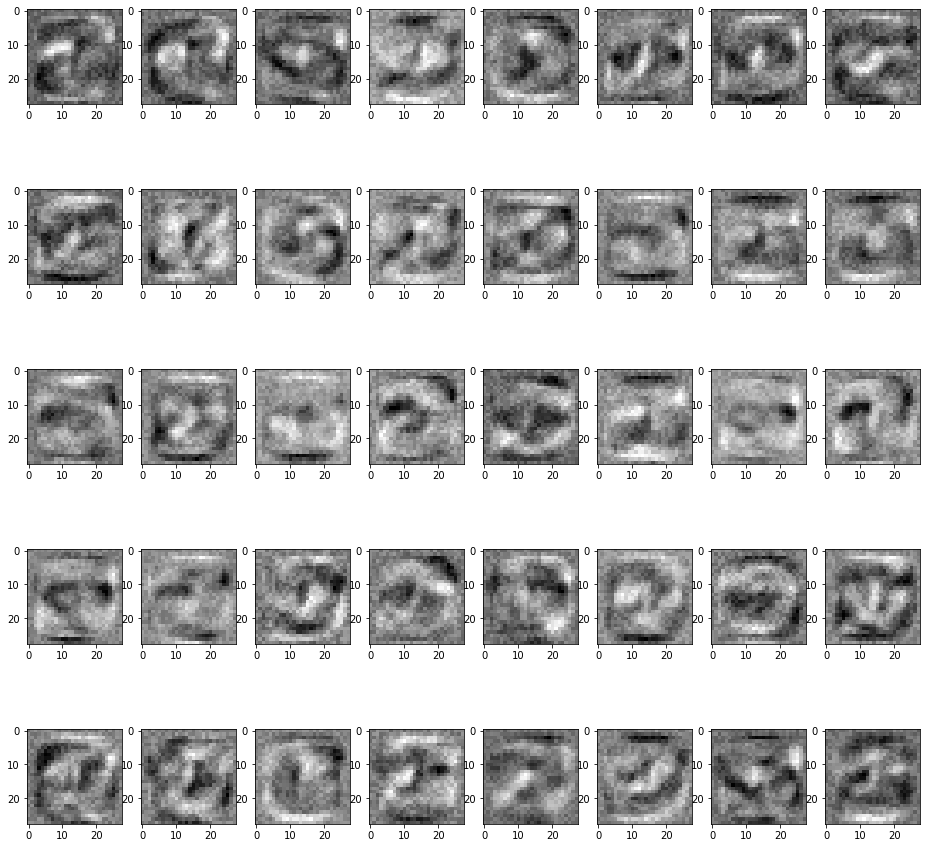

In [13]:
# Write your code here 
# Use the same layer design from the above cell. Play with the parameter "first_layer_size" above. 
# It is preferred to have first_layer_size as multiplication of 8 (for visualizing the weights properly)
first_layer_size_model2 = 40

model2 = Sequential()
model2.add(Dense(first_layer_size_model2, activation='sigmoid', input_shape=(784,)))
model2.add(Dense(32, activation='sigmoid'))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()
model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model2.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size_model2/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Write your findings about influence of nodes here?

1.   Finding 1 : First Layer size is 8
* Test loss: 0.7331901484489441
* Test accuracy: 0.8147
2.   Finding 2 : First Layer size 
* Test loss: 0.3145703971385956
* Test accuracy: 0.9150999784469604

**When number of layer size is increased, loss is descreased and accuracy is increased.**





# Part 3: Design Choices: Layers
#### Analyze the parameter size, accuracy and training time

### Design a model with small number of layers. For example 1 hidden layer

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7565 - accuracy: 0.7996 - val_loss: 0.2641 - val_accuracy: 0.9260
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2532 - accuracy: 0.9283 - val_loss: 0.2173 - val_accuracy: 0.9372
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2057 - accuracy: 0.9418 - val_loss: 0.1896 - val_accuracy: 0.9446
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1735 - acc

### Lower number of Layers. For example 4 hidden layers

In [27]:
# Write your code here 
# Use the same number of units from the above cell 
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(784,)))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.summary()
model3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_66 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_69 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.9041 - accuracy: 0.6981 - val_loss: 0.2

### Write your findings about influence of layers here?

1.   Finding 1 : 1 Hidden Layer
* Test loss: 0.12942270934581757
* Test accuracy: 0.9631999731063843
2.   Finding 2 : 3 Hidden Layer
* Test loss: 0.11299129575490952
* Test accuracy: 0.9681000113487244

**Layer numbers affect accuracy and loss. When I added the second and third layers, the loss is decreased and accuracy is increased. But after the fourth and fifth layer accuracy started dropping.**